In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt



import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

datapath = "../data"

def extractImagesAndLabels(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='bytes')   
    images = dict[b'data']
    images = np.reshape(images, (10000, 3, 32, 32))
    labels = dict[b'labels']
    return images, labels

def extractCategories(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='utf8')
    
    print('\nKeys :')
    for key in dict.keys():
        print(key)
    
    print('\nNum_cases_per_batch :')
    print(dict['num_cases_per_batch'])
    
    print('\nLabel Names :')
    labels = dict['label_names']
    for label in labels:
        print(label)
 
    print('\nNum_vis :')
    print(dict['num_vis'])
    
    return dict['label_names']

def getDictionaryKeys(path, file):
    f = open(path+file, 'rb')
    dict = pickle.load(f, encoding='bytes')
    
    for key in dict.keys():
        print(key)

categories = extractCategories(datapath+"/CIFAR-10/cifar-10-batches-py/", "batches.meta")


Keys :
num_cases_per_batch
label_names
num_vis

Num_cases_per_batch :
10000

Label Names :
airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck

Num_vis :
3072


In [2]:
getDictionaryKeys(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_1")

b'batch_label'
b'labels'
b'data'
b'filenames'


In [3]:
print ('loading .... ')
images1, labels1 = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_1")
images2, labels2 = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_2")
images3, labels3 = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_3")
images4, labels4 = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_4")
images5, labels5 = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "data_batch_5")

print ('merging .... ')
print (len(labels1))
images = np.vstack((images1, images2, images3, images4, images5))
labels = np.concatenate((labels1, labels2, labels3, labels4, labels5))
print (images.shape)
print (labels.shape)
testimages, testlabels = extractImagesAndLabels(datapath+"/CIFAR-10/cifar-10-batches-py/", "test_batch")

loading .... 
merging .... 
10000
(50000, 3, 32, 32)
(50000,)


In [4]:
images1 = None
images2 = None
images3 = None
images4 = None
images5 = None
labels1 = None
labels2 = None
labels3 = None
labels4 = None
labels5 = None

(32, 32, 3)
deer


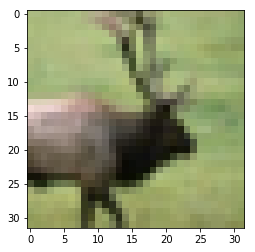

In [5]:
def getImage(id):
    image = images[id]
    image = image.transpose([1, 2, 0])
    image = image.astype('float32')
    image /= 255
    return image

imgid=34
image = getImage(imgid)
print(image.shape)
%matplotlib inline
imgplot = plt.imshow(image)
categoryid = labels[imgid]
print(categories[categoryid])

(50000, 3, 32, 32)
(50000, 32, 32, 3)
(32, 32, 3)
airplane


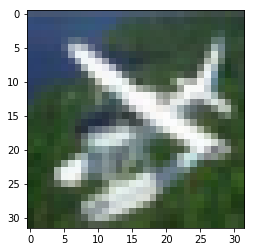

In [6]:
def getImage(id, _images):
    print(_images.shape)
    _images = _images.transpose([0, 2, 3, 1])
    print(_images.shape)
    image = _images[id]
    image = image.astype('float32')
    image /= 255
    return image

imgid=2345
image = getImage(imgid, images)
print(image.shape)
%matplotlib inline
imgplot = plt.imshow(image)
categoryid = labels[imgid]
print(categories[categoryid])

In [7]:
from __future__ import print_function
import numpy as np 
np.random.seed(1337) 

import keras
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Activation, Flatten, Input, MaxPooling2D, Dropout
from keras.layers import Conv2D
import h5py  # to ensure we have this package installed 


from keras.callbacks import ModelCheckpoint

batch_size = 32
num_classes = 10
epochs = 50

Using TensorFlow backend.


In [8]:
images = images.transpose([0, 2, 3, 1])
testimages = testimages.transpose([0, 2, 3, 1])
x_train = images
y_train = labels
x_test = testimages
y_test = testlabels

print ("x_train shape : "+str(x_train.shape))
print ("y_train shape : "+str(len(y_train)))

print ("x_test shape : "+str(x_test.shape))
print ("y_test shape : "+str(len(y_test)))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


x_train shape : (50000, 32, 32, 3)
y_train shape : 50000
x_test shape : (10000, 32, 32, 3)
y_test shape : 10000


In [9]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
# input layer is the same as our typical CNN model 
nlayer1 = 100
nlayer2 = 200
nlayer3 = 300
nlayer4 = 400
nlayer5 = 500
nlayer6 = 800

inputs = Input(shape=(32, 32, 3))

output = Conv2D(nlayer1, (2, 2), strides=(1, 1), padding='same', activation='relu')(inputs)
output = Conv2D(nlayer1, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Conv2D(nlayer1, (2, 2), strides=(2, 2), padding='same', activation='relu')(output)

output = Conv2D(nlayer2, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Dropout(0.1)(output)
output = Conv2D(nlayer2, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Dropout(0.1)(output)
output = Conv2D(nlayer2, (2, 2), strides=(2, 2), padding='same', activation='relu')(output)

output = Conv2D(nlayer3, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Dropout(0.2)(output)
output = Conv2D(nlayer3, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Dropout(0.2)(output)
output = Conv2D(nlayer3, (2, 2), strides=(2, 2), padding='same', activation='relu')(output)

output = Conv2D(nlayer4, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
#output = Dropout(0.3)(output)
output = Conv2D(nlayer4, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
#output = Dropout(0.3)(output)
output = Conv2D(nlayer4, (2, 2), strides=(2, 2), padding='same', activation='relu')(output)

output = Conv2D(nlayer5, (2, 2), strides=(1, 1), padding='same', activation='relu')(output)
output = Conv2D(nlayer5, (1, 1), strides=(1, 1), padding='same', activation='relu')(output)

x = Flatten()(output) 

x = Dense(num_classes)(x) 

output = Activation('softmax')(x)  

In [11]:
model = Model([inputs], output)

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 100)       1300      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 100)       40100     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 100)       40100     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 200)       80200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 200)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 200)       160200    
__________

In [13]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

filepath="checkpoints/cifar10-cnnall100-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_acc', 
                             verbose=1, 
                             mode='max')

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          callbacks=[checkpoint])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 90s 2ms/step - loss: 1.8322 - acc: 0.3280 - val_loss: 1.6226 - val_acc: 0.4186

Epoch 00001: saving model to checkpoints/cifar10-cnnall100-01-0.42.hdf5
Epoch 2/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.5145 - acc: 0.4436 - val_loss: 1.3893 - val_acc: 0.4975

Epoch 00002: saving model to checkpoints/cifar10-cnnall100-02-0.50.hdf5
Epoch 3/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.3235 - acc: 0.5196 - val_loss: 1.2610 - val_acc: 0.5346

Epoch 00003: saving model to checkpoints/cifar10-cnnall100-03-0.53.hdf5
Epoch 4/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.1811 - acc: 0.5744 - val_loss: 1.1464 - val_acc: 0.5830

Epoch 00004: saving model to checkpoints/cifar10-cnnall100-04-0.58.hdf5
Epoch 5/50
50000/50000 [==============================] - 87s 2ms/step - loss: 1.0595 - acc: 0.6214 - val_loss

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")